# **Ассинхронное программирование**

Асинхронное программирование – это вид параллельного программирования, в котором какая-либо единица работы может выполняться отдельно от основного потока выполнения приложения. Когда работа завершается, основной поток получает уведомление о завершении рабочего потока или произошедшей ошибке. У такого подхода есть множество преимуществ, таких как повышение производительности приложений и повышение скорости отклика.
В последние несколько лет асинхронное программирование привлекло к себе пристальное внимание, и на то есть причины. Несмотря на то, что этот вид программирования может быть сложнее традиционного последовательного выполнения, он гораздо более эффективен.

Например, вместо того, что ждать завершения HTTP-запроса перед продолжением выполнения, вы можете отправить запрос и выполнить другую работу, которая ждет своей очереди, с помощью асинхронных корутин в Python.

Асинхронность – это одна из основных причин популярности выбора Node.js для реализации бэкенда. Большое количество кода, который мы пишем, особенно в приложениях с тяжелым вводом-выводом, таком как на веб-сайтах, зависит от внешних ресурсов. В нем может оказаться все, что угодно, от удаленного вызова базы данных до POST-запросов в REST-сервис. Как только вы отправите запрос в один из этих ресурсов, ваш код будет просто ожидать ответа. С асинхронным программированием вы позволяете своему коду обрабатывать другие задачи, пока ждете ответа от ресурсов.

# **Что такое параллелизм?**

Параллелизм дает возможность работать над несколькими вычислениями одновременно в одной программе. Такого поведения в Python можно добиться несколькими способами:

* Используя многопоточность threading, позволяя нескольким потокам работать по очереди.

* Используя несколько ядер процессора multiprocessing. Делать сразу несколько вычислений, используя несколько ядер процессора. Это и называется параллелизмом.

* Используя асинхронный ввод-вывод с модулем asyncio. Запуская какую то задачу, продолжать делать другие вычисления, вместо ожидания ответа от сетевого подключения или от операций чтения/записи.

# **Отличия между асинхронным и синхронным кодом**

При синхронном программировании компьютер выполняет операции последовательно одну за другой. В таком случае каждая последующая операция будет заблокирована до тех пор, пока не завершится выполнение предыдущей.

Асинхронное программирование позволяет запускать операции параллельно, не дожидаясь выполнения последовательности. Это как если бы у вас было восемь рук и вы могли одновременно мыть посуду, пылесосить, читать газету и гладить кота. Жаль, что это невозможно в быту — зато вполне реально в разработке ПО. К тому же асинхронное программирование на Python становится все более популярным.

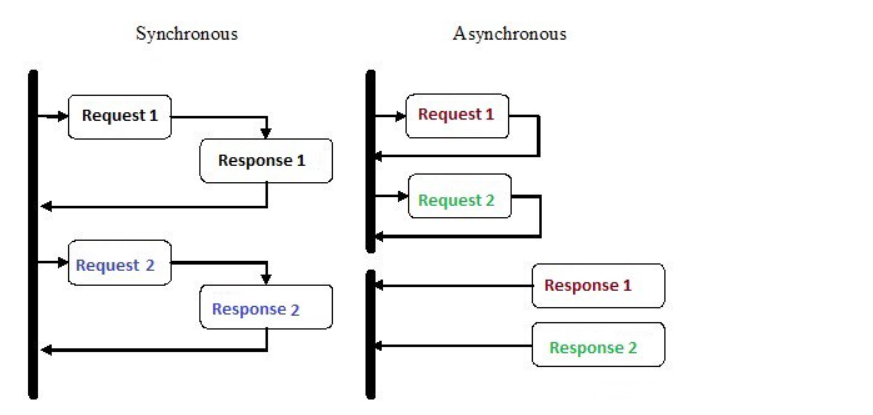

В этих примерах будут показаны две задачи с измерением времени: первая использует синхронный код, а вторая использует асинхронный код

In [ ]:
import time

def perform_task(task_name, duration):
    print(f"Начинаю задачу {task_name}")
    time.sleep(duration)
    print(f"Задача {task_name} завершена")

def main():
    start_time = time.time()  # Начинаем измерение времени

    # Выполняем задачи синхронно
    perform_task("Задача 1", 2)
    perform_task("Задача 2", 3)
    perform_task("Задача 3", 1)

    end_time = time.time()  # Останавливаем измерение времени
    total_time = end_time - start_time
    print(f"Общее время выполнения: {total_time:.2f} секунды")

# Запускаем главную функцию
main()

Начинаю задачу Задача 1
Задача Задача 1 завершена
Начинаю задачу Задача 2
Задача Задача 2 завершена
Начинаю задачу Задача 3
Задача Задача 3 завершена
Общее время выполнения: 6.02 секунды


In [ ]:
import asyncio
import time

async def perform_task(task_name, duration):
    print(f"Начинаю задачу {task_name}")
    await asyncio.sleep(duration)
    print(f"Задача {task_name} завершена")

async def main():
    start_time = time.time()  # Начинаем измерение времени

    # Выполняем задачи асинхронно
    tasks = [
        perform_task("Задача 1", 2),
        perform_task("Задача 2", 3),
        perform_task("Задача 3", 1)
    ]
    await asyncio.gather(*tasks)  # Выполняем все задачи параллельно

    end_time = time.time()  # Останавливаем измерение времени
    total_time = end_time - start_time
    print(f"Общее время выполнения: {total_time:.2f} секунды")

# Запускаем главную функцию
asyncio.run(main())


Начинаю задачу Задача 1
Начинаю задачу Задача 2
Начинаю задачу Задача 3
Задача Задача 3 завершена
Задача Задача 1 завершена
Задача Задача 2 завершена
Общее время выполнения: 3.00 секунды


# **Основы asyncio**

Asyncio – модуль асинхронного программирования, который был представлен в Python 3.4. Он предназначен для использования корутин и future для упрощения написания асинхронного кода и делает его почти таким же читаемым, как синхронный код, из-за отсутствия callback-ов.

Корутина – это специальная функция, определенная с использованием ключевого слова async. Корутины позволяют выполнять задачи асинхронно, приостанавливая и возобновляя выполнение в зависимости от событий.

Ключевые слова async и await используются для определения корутин и ожидания выполнения асинхронных операций. Корутина начинается с async, а await используется для ожидания завершения асинхронных задач.

Асинхронные задачи (Task) – это объект, представляющий выполнение корутины. С помощью задач можно управлять выполнением корутин, включая запуск, приостановку и завершение.

Асинхронный событийный цикл (Event Loop) – это основа asyncio, которая управляет выполнением асинхронных задач и обработкой событий. Событийный цикл отвечает за запуск корутин, отслеживание их состояния и управление переходами между ними.



Библиотека asyncio - это стандартная библиотека Python для асинхронного программирования. Она предоставляет инструменты для создания асинхронных функций, управления параллельными задачами и обработки событий.

In [ ]:
import nest_asyncio

nest_asyncio.apply()

# **Примеры**

1)Асинхронной задержки с использованием asyncio.sleep():

In [ ]:
import asyncio

# Асинхронная функция для имитации задержки
async def delay_example():
    print("Начинаю ожидание...")
    # Имитация задержки на 2 секунды
    await asyncio.sleep(2)
    print("Задержка завершена!")

# Запуск главной корутины без использования asyncio.run()
task = asyncio.create_task(delay_example())

# Ждем завершения корутины
await task

Начинаю ожидание...
Задержка завершена!


Пояснение

* Функция delay_example() определена как асинхронная (async def).

* Внутри delay_example(), мы используем await asyncio.sleep(1), чтобы создать асинхронную задержку на 1 секунду.

* Функция выводит сообщения до и после задержки, показывая, как асинхронная функция может приостановить свое выполнение без блокировки всего процесса.

* Мы вызываем функцию delay_example() с await непосредственно в ячейке кода, чтобы запустить асинхронную функцию.

2)Выполнение нескольких асинхронных задач одновременно с asyncio.gather():

In [ ]:
import asyncio

# Асинхронная функция для имитации загрузки данных
async def fetch_data(url):
    print(f"Загрузка данных из {url}")
    await asyncio.sleep(1)  # Имитация задержки загрузки данных
    print(f"Данные из {url} загружены")
    return f"Данные из {url}"

# Главная функция
async def main():
    urls = ["https://example.com/data1", "https://example.com/data2", "https://example.com/data3"]

    # Создаем асинхронные задачи для загрузки данных из каждого URL
    tasks = [fetch_data(url) for url in urls]

    # Выполняем все задачи одновременно
    results = await asyncio.gather(*tasks)

    # Выводим результаты загрузки данных
    for result in results:
        print(result)

# Запускаем главную функцию
await main()



Загрузка данных из https://example.com/data1
Загрузка данных из https://example.com/data2
Загрузка данных из https://example.com/data3
Данные из https://example.com/data1 загружены
Данные из https://example.com/data2 загружены
Данные из https://example.com/data3 загружены
Данные из https://example.com/data1
Данные из https://example.com/data2
Данные из https://example.com/data3


Пояснение

* fetch_data(url) — это асинхронная функция, имитирующая загрузку данных из заданного URL.

* В main() мы создаем список асинхронных задач (tasks) для загрузки данных из каждого URL.

* asyncio.gather(*tasks) запускает все задачи одновременно и ждет их завершения.
После завершения всех задач main() выводит результаты загрузки данных.

* Мы вызываем await main() непосредственно в ячейке кода для запуска главной функции main().

3)Асинхронное чтение и запись файлов с aiofiles:


In [ ]:
!pip install aiofiles


In [ ]:
import asyncio
import aiofiles

# Асинхронная функция для чтения файла
async def read_file(file_path):
    async with aiofiles.open(file_path, 'r') as file:
        content = await file.read()
    print(f"Содержимое файла '{file_path}': {content}")

# Асинхронная функция для записи данных в файл
async def write_file(file_path, data):
    async with aiofiles.open(file_path, 'w') as file:
        await file.write(data)
    print(f"Данные записаны в файл '{file_path}'")

# Главная функция
async def main():
    file_path = 'example.txt'  # Путь к файлу

    # Данные для записи
    data_to_write = "Пример данных для записи в файл."

    # Записываем данные в файл асинхронно
    await write_file(file_path, data_to_write)

    # Читаем содержимое файла асинхронно
    await read_file(file_path)

# Запускаем главную функцию
await main()


Данные записаны в файл 'example.txt'
Содержимое файла 'example.txt': Пример данных для записи в файл.


Пояснение

* Мы используем библиотеку aiofiles, которая предоставляет асинхронные методы для работы с файлами (open, read, write).

* read_file(file_path) открывает файл в режиме чтения ('r') и асинхронно читает его содержимое с помощью await file.read().

* write_file(file_path, data) открывает файл в режиме записи ('w') и асинхронно записывает данные в файл с помощью await file.write(data).

* В главной функции main() мы сначала записываем данные в файл асинхронно, а затем асинхронно читаем его содержимое.

* Мы вызываем await main() непосредственно в ячейке кода для запуска главной функции main().

# **Преимущества асинхронного программирования**

Асинхронное программирование позволяет эффективно управлять задачами, связанными с вводом-выводом, и одновременно выполнять несколько задач, что повышает производительность программы. Однако оно также может создать некоторые вызовы. Давайте рассмотрим преимущества и вызовы асинхронного программирования:


Асинхронное программирование позволяет выполнять несколько задач параллельно, что повышает производительность программы.
Программа не блокируется при ожидании завершения долгих операций (например, сетевых запросов или операций ввода-вывода).
Позволяет создавать более отзывчивые приложения, особенно в контексте пользовательского интерфейса.
Параллельное выполнение задач позволяет быстрее обрабатывать запросы и данные.
Асинхронное программирование позволяет легко масштабировать приложение, поскольку параллельное выполнение задач можно легко управлять и контролировать.

Задача 1.
Вам нужно отправить несколько сетевых запросов к разным URL и обработать их ответы. Сделать это асинхронно, чтобы не блокировать выполнение программы.

In [ ]:
import asyncio
import aiohttp

# Асинхронная функция для отправки сетевого запроса
async def fetch_url(url):
    async with aiohttp.ClientSession() as session:
        async with session.get(url) as response:
            data = await response.text()
            print(f"Получены данные из {url}")
            return data

# Главная функция
async def main():
    urls = [
        "https://httpbin.org/get",
        "https://httpbin.org/ip",
        "https://httpbin.org/headers"
    ]

    # Параллельно отправляем запросы ко всем URL
    tasks = [fetch_url(url) for url in urls]
    responses = await asyncio.gather(*tasks)

    # Обработка полученных ответов
    for response in responses:
        print(response[:100])  # Вывод первых 100 символов ответа

# Запуск главной функции
asyncio.run(main())


Получены данные из https://httpbin.org/ip
Получены данные из https://httpbin.org/get
Получены данные из https://httpbin.org/headers
{
  "args": {}, 
  "headers": {
    "Accept": "*/*", 
    "Accept-Encoding": "gzip, deflate", 
    "
{
  "origin": "34.148.9.52"
}

{
  "headers": {
    "Accept": "*/*", 
    "Accept-Encoding": "gzip, deflate", 
    "Host": "httpbin



Пояснение

* fetch_url(url):
Это асинхронная функция для отправки сетевого запроса по данному URL.
Сначала функция создает сессию aiohttp.ClientSession() для работы с сетью.

* С помощью сессии выполняется HTTP-запрос session.get(url).
После завершения запроса await response.text() используется для получения текста ответа.

* Функция возвращает текст ответа.
main():
Это главная функция, в которой мы собираем несколько URL для запросов.
Мы создаем список асинхронных задач (tasks) для выполнения запросов ко всем URL, используя fetch_url для каждого URL.

* Затем мы используем asyncio.gather(*tasks), чтобы выполнить все запросы параллельно и собрать все ответы в список responses.
Наконец, мы обрабатываем каждый ответ, выводя первые 100 символов каждого ответа.

Задача 2.Вам нужно выполнить несколько длительных вычислительных задач параллельно и синхронизировать их выполнение для правильной обработки результатов.

In [ ]:
import asyncio

# Асинхронная функция для длительных вычислений
async def compute(task_id, lock):
    print(f"Начинаю выполнение задачи {task_id}")
    await asyncio.sleep(2)  # Имитация сложной вычислительной задачи

    # Используем Lock для синхронизации доступа к общим ресурсам
    async with lock:
        print(f"Синхронизированный доступ для задачи {task_id}")
        result = f"Результат задачи {task_id}"
    print(f"Завершено выполнение задачи {task_id}")
    return result

# Главная функция
async def main():
    lock = asyncio.Lock()  # Создаем Lock для синхронизации

    # Список задач для выполнения
    tasks = [compute(i, lock) for i in range(1, 4)]

    # Параллельно выполняем все задачи
    results = await asyncio.gather(*tasks)

    # Обрабатываем результаты задач
    for result in results:
        print(result)

# Запуск главной функции
asyncio.run(main())


Начинаю выполнение задачи 1
Начинаю выполнение задачи 2
Начинаю выполнение задачи 3
Синхронизированный доступ для задачи 1
Завершено выполнение задачи 1
Синхронизированный доступ для задачи 2
Завершено выполнение задачи 2
Синхронизированный доступ для задачи 3
Завершено выполнение задачи 3
Результат задачи 1
Результат задачи 2
Результат задачи 3


Пояснение
* read_file(file_path):
Это асинхронная функция для чтения содержимого файла.
Мы используем aiofiles.open(file_path, mode='r') для открытия файла в режиме чтения.С использованием await file.read() мы читаем все содержимое файла асинхронно.
Выводим первые 100 символов содержимого файла на консоль.
Функция возвращает содержимое файла.

* write_file(file_path, data):
Асинхронная функция для записи данных в файл.
Мы открываем файл в режиме записи (aiofiles.open(file_path, mode='w')).
Используя await file.write(data), мы асинхронно записываем данные в файл.
Выводим сообщение об успешной записи данных в файл.

* main():
Это главная функция, в которой мы задаем путь к файлу для чтения и записи.
Сначала мы читаем данные из файла read_path с использованием await read_file(read_path).
Затем мы обрабатываем данные, например, преобразуем их в верхний регистр (processed_content = content.upper()).
После этого мы записываем обработанные данные в новый файл write_path с использованием await write_file(write_path, processed_content).

Задача 3.Напишите асинхронную программу для поиска простых чисел в заданных диапазонах. Ваша программа должна содержать асинхронную функцию, которая ищет простые числа в заданном диапазоне, а затем объединить несколько задач для выполнения поиска в нескольких диапазонах одновременно. Измерьте время выполнения и выведите количество найденных простых чисел в каждом диапазоне.

In [ ]:
import asyncio
import time

# Функция для проверки простого числа
def is_prime(num):
    if num < 2:
        return False
    for i in range(2, int(num ** 0.5) + 1):
        if num % i == 0:
            return False
    return True

# Асинхронная функция для поиска простых чисел в заданном диапазоне
async def find_primes(start, end):
    primes = []
    for num in range(start, end):
        if is_prime(num):
            primes.append(num)
    return primes

# Главная функция
async def main():
    start_time = time.time()  # Начинаем измерение времени

    # Выполняем задачи асинхронно
    tasks = [
        find_primes(2, 50000),  # Первый диапазон
        find_primes(50000, 100000),  # Второй диапазон
        find_primes(100000, 150000)  # Третий диапазон
    ]
    results = await asyncio.gather(*tasks)  # Выполняем все задачи параллельно

    end_time = time.time()  # Останавливаем измерение времени
    total_time = end_time - start_time
    print(f"Общее время выполнения: {total_time:.2f} секунды")

    # Обработка результатов
    for i, primes in enumerate(results):
        print(f"Количество простых чисел в диапазоне {i + 1}: {len(primes)}")

# Запускаем главную функцию
asyncio.run(main())


Общее время выполнения: 0.39 секунды
Количество простых чисел в диапазоне 1: 5133
Количество простых чисел в диапазоне 2: 4459
Количество простых чисел в диапазоне 3: 4256


Задача 4.Напишите асинхронную программу для вычисления суммы больших списков чисел. Ваша программа должна содержать асинхронную функцию для вычисления суммы списка чисел и объединить несколько задач для выполнения суммирования в нескольких списках одновременно. Измерьте время выполнения и выведите общую сумму.

In [ ]:
import asyncio
import time

# Асинхронная функция для вычисления суммы списка чисел
async def sum_large_numbers(numbers):
    total_sum = sum(numbers)
    return total_sum

# Главная функция
async def main():
    start_time = time.time()  # Начинаем измерение времени

    # Создаем большие списки чисел
    numbers_list_1 = list(range(1, 1000000))
    numbers_list_2 = list(range(1000000, 2000000))
    numbers_list_3 = list(range(2000000, 3000000))

    # Выполняем задачи асинхронно
    tasks = [
        sum_large_numbers(numbers_list_1),
        sum_large_numbers(numbers_list_2),
        sum_large_numbers(numbers_list_3)
    ]
    results = await asyncio.gather(*tasks)  # Выполняем все задачи параллельно

    end_time = time.time()  # Останавливаем измерение времени
    total_time = end_time - start_time
    print(f"Общее время выполнения: {total_time:.2f} секунды")

    # Обработка результатов
    total_sum = sum(results)
    print(f"Общая сумма: {total_sum}")

# Запускаем главную функцию
asyncio.run(main())


Общее время выполнения: 0.24 секунды
Общая сумма: 4499998500000


# **Недостатки асинхронного программирования**

Асинхронное программирование имеет множество преимуществ, таких как параллельное выполнение задач, высокая отзывчивость, управление ресурсами и эффективность. Однако существуют и недостатки, которые могут возникнуть при использовании асинхронного кода. Я объясню несколько из них и продемонстрирую, как они могут возникнуть в коде.

Задача 1.В этой задаче демонстрируется, как отсутствие синхронизации между задачами может привести к гонке задач и некорректным результатам.

In [ ]:
import asyncio

counter = 0

async def increment():
    global counter
    # Несинхронизированный доступ к переменной counter может привести к гонке задач
    counter += 1
    print(f"Значение счетчика: {counter}")

async def main():
    tasks = [increment() for _ in range(10)]
    await asyncio.gather(*tasks)
    print(f"Окончательное значение счетчика: {counter}")

# Запускаем главную функцию
asyncio.run(main())


Значение счетчика: 1
Значение счетчика: 2
Значение счетчика: 3
Значение счетчика: 4
Значение счетчика: 5
Значение счетчика: 6
Значение счетчика: 7
Значение счетчика: 8
Значение счетчика: 9
Значение счетчика: 10
Окончательное значение счетчика: 10


Недостаток: В этом коде несколько задач асинхронно увеличивают глобальный счетчик counter. Однако, поскольку доступ к переменной не синхронизирован, результат может быть некорректным из-за гонки между задачами. Это может привести к неуверенности в результатах и ошибкам.

Задача 2.В этой задаче демонстрируется, как неправильная обработка исключений может привести к неожиданному поведению.Асинхронный код может быть сложнее для понимания и отладки. Например, нужно контролировать и отслеживать множество асинхронных задач.

In [ ]:
import asyncio

async def fetch_data(url):
    await asyncio.sleep(1)
    print(f"Получены данные из {url}")
    return f"Данные из {url}"

async def main():
    urls = ["https://example.com/1", "https://example.com/2"]
    tasks = [fetch_data(url) for url in urls]
    # Предполагаем, что все задачи должны завершиться через 1 секунду.
    # Ошибки в задачах не отслеживаются, что может привести к неожиданным проблемам.
    results = await asyncio.gather(*tasks)
    print("Результаты:", results)

asyncio.run(main())




Получены данные из https://example.com/1
Получены данные из https://example.com/2
Результаты: ['Данные из https://example.com/1', 'Данные из https://example.com/2']


Если в асинхронной функции fetch_data возникает ошибка, она не обрабатывается должным образом, и asyncio.gather может вернуть исключение, которое не будет обработано в main(). Это делает код менее устойчивым и сложным в отладке.

# **Вывод**



 Асинхронное программирование особенно эффективно в сценариях, где большое количество задач должно обрабатываться одновременно, оптимизируя использование ресурсов. К преимуществам можно отнести повышенную производительность, простоту использования с появлением таких библиотек, как asyncio, и улучшенную отзывчивость приложений. Однако есть и недостатки: асинхронный код может быть сложнее понять и отладить, особенно новичкам, управление ошибками может быть сложнее, а одновременный запуск большого количества задач может перегрузить ресурсы. Соблюдение баланса между асинхронным и синхронным кодом, а также правильная обработка ошибок и управление ресурсами помогут максимально использовать преимущества асинхронного программирования.
